# Libraries and Imports

In [1]:
from keras.models import *
from keras.layers import *
from keras import Input
from keras import Sequential
from tensorflow import keras
from keras import metrics

import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import numpy as np                      

from PIL import Image, ImageOps
from matplotlib import pyplot as plt    
import cv2
import math
import tensorflow as tf

import sys


In [2]:
# Checks if GPU is available
print("nums of GPus: ", len(tf.config.experimental.list_physical_devices('GPU')))

nums of GPus:  1


# Data and Preprocessing

In [3]:
path = 'data.csv'

In [4]:
data = pd.read_csv(path , nrows= 15000)

In [5]:
data

,Files,Label,Centers
0,images/img0.jpg,rectangle,"(341, 265)"
1,images/img1.jpg,triangle,"(383, 199)"
2,images/img2.jpg,rectangle,"(487, 280)"
3,images/img3.jpg,triangle,"(389, 257)"
4,images/img4.jpg,triangle,"(145, 221)"
...,...,...,...
14995,images/img14995.jpg,rectangle,"(259, 227)"
14996,images/img14996.jpg,triangle,"(356, 268)"
14997,images/img14997.jpg,rectangle,"(341, 272)"
14998,images/img14998.jpg,triangle,"(355, 107)"


In [6]:
images = [ np.asarray(ImageOps.grayscale(Image.open(x)), dtype = 'float32')/255  for x in data['Files'] ]

In [7]:
Y1 = data.iloc[ : , 2:3 ]


Y1 = pd.DataFrame(Y1)

In [8]:
Y1

,Centers
0,"(341, 265)"
1,"(383, 199)"
2,"(487, 280)"
3,"(389, 257)"
4,"(145, 221)"
...,...
14995,"(259, 227)"
14996,"(356, 268)"
14997,"(341, 272)"
14998,"(355, 107)"


In [9]:
xList = []
lList = []
allList = []
for x in range(15000):
    
    temp = Y1['Centers'][x].split(",")
    temp[0] = temp[0].replace("(" , "")
    temp[1] = temp[1].replace(")" , "")
    temp[1] = temp[1].replace(" " , "")
    
    xList.append(temp[0])
    lList.append(temp[1])
    tempList = [temp[0] , temp[1]]
    allList.append(tempList)
        

In [10]:
Y1['x1'] = xList
Y1['y1'] = lList
Y1 = Y1.drop(['Centers'], axis=1)

In [11]:
Y1 = Y1.astype(float)

In [12]:
Y1

,x1,y1
0,341.0,265.0
1,383.0,199.0
2,487.0,280.0
3,389.0,257.0
4,145.0,221.0
...,...,...
14995,259.0,227.0
14996,356.0,268.0
14997,341.0,272.0
14998,355.0,107.0


In [13]:
maxNums = Y1.max(axis = 0)
maxNums

x1    554.0
y1    371.0
dtype: float64

In [14]:
Y1['x1'] = Y1['x1']/maxNums[0]
Y1['y1'] = Y1['y1']/maxNums[1]

In [15]:
Y1

,x1,y1
0,0.615523,0.714286
1,0.691336,0.536388
2,0.879061,0.754717
3,0.702166,0.692722
4,0.261733,0.595687
...,...,...
14995,0.467509,0.611860
14996,0.642599,0.722372
14997,0.615523,0.733154
14998,0.640794,0.288410


In [16]:
Y1 = Y1.astype(float)

In [17]:
images = np.asarray(images)
images = images.reshape(  len(images), 400, 600, 1 )

In [18]:
x_train , x_test , y_train , y_test = train_test_split(images,Y1, test_size=0.2)

# Model

In [26]:
model = Sequential()

model.add( Input(shape=(400,600 ,1), dtype="float32"   )  )
model.add(Conv2D(2, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(6, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(12, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(24, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add( Dense(2, activation='linear')  )


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 398, 598, 2)       20        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 199, 299, 2)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 197, 297, 6)       114       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 98, 148, 6)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 96, 146, 12)       660       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 48, 73, 12)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 71, 24)       

In [27]:
model.compile(optimizer="adam",loss="mean_squared_error")

# Training

In [28]:
model.fit( x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
169/169 [==============================] - 11s 61ms/step - loss: 0.0625 - val_loss: 0.0147
Epoch 2/10
169/169 [==============================] - 10s 58ms/step - loss: 0.0127 - val_loss: 0.0056
Epoch 3/10
169/169 [==============================] - 10s 57ms/step - loss: 0.0052 - val_loss: 0.0039
Epoch 4/10
169/169 [==============================] - 10s 58ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 5/10
169/169 [==============================] - 10s 57ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 6/10
169/169 [==============================] - 10s 57ms/step - loss: 0.0028 - val_loss: 0.0031
Epoch 7/10
169/169 [==============================] - 10s 58ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 8/10
169/169 [==============================] - 10s 60ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 9/10
169/169 [==============================] - 10s 57ms/step - loss: 0.0023 - val_loss: 0.0029
Epoch 10/10
169/169 [==============================] - 9s 54ms/step - loss: 0.0020

# Evaluation

In [29]:
model.evaluate(x_test,y_test)

94/94 [==============================] - 1s 12ms/step - loss: 0.0023


0.0022584935650229454

In [107]:
model.save('MidPointDetectMoreDataGpuV1')

INFO:tensorflow:Assets written to: MidPointDetectMoreDataGpuV1\assets


In [20]:
modelCheck = keras.models.load_model('MidPointDetectMoreDataGpuV1')


In [26]:
modelCheck.evaluate(x_test,y_test)

94/94 [==============================] - 2s 14ms/step - loss: 0.0015


0.0015207341639325023

In [21]:
modelCheck.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 398, 598, 2)       20        
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 199, 299, 2)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 197, 297, 6)       114       
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 98, 148, 6)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 96, 146, 12)       660       
_________________________________________________________________
max_pooling2d_64 (MaxPooling (None, 48, 73, 12)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 46, 71, 24)      

# Prediction

In [56]:
def get_pred(arg1):
    modelTest = keras.models.load_model('MidPointDetectMoreDataGpuV1')

    image1 = np.asarray(ImageOps.grayscale(Image.open(arg1)), dtype = 'float32')/255
    
    image1 = np.asarray(image1)
    image1 = image1.reshape(  1, 400, 600, 1 )        
    
    
    result = modelTest.predict(image1)

    print("X Cordinate:")
    print(result[0][0] * 554)
    print("Y Cordinate:")
    print(result[0][1] * 371)
    
    img1 = Image.open(arg1)
    
    plt.imshow(img1, cmap="gray")

    # Plot random point 1
    x1 = int(result[0][0] * 554)
    y1 = int(result[0][1] * 371)

    plt.plot( x1, y1, marker=".", color="cyan", markersize=10 )



X Cordinate:
336.57954382896423
Y Cordinate:
167.62967067956924


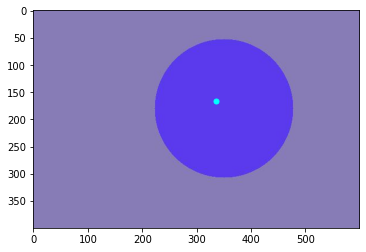

In [57]:
get_pred("images/img49999.jpg")